# COSC2753 - Assignment 2 - Classify Images of Colon Cancer

**RMIT University Vietnam**

**Course:** COSC2753

**Group:** MK Sapiens

**Student 1:** Pham Cong Minh - s3818102

**Student 2:** Nguyen Bao Khang - s3817970

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 21 May 2021

## Main task
* Classify images according to whether given cell image represents a cancerous cells or not (isCancerous).
* Classify images according to cell-type, such as: fibroblast, inflammatory, epithelial or others.

## 1. Setup notebook

In [1]:
# !pip install tensorflow
# !pip install keras
# !pip install opencv-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('dark_background')
import seaborn as sns
from tqdm import tqdm

import cv2
import os
import tensorflow as tf
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

print('Using Tensorflow version:', tf.__version__)

Using Tensorflow version: 2.4.1


## 2. Data inspecting

### 2.1. Load csv files

In [3]:
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

In [4]:
main_data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [5]:
main_data.shape

(9896, 6)

In [6]:
extra_data.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [7]:
extra_data.shape

(10384, 4)

### 2.2. Inspect csv files

From the specifications, the main_data contains both cellType (0 to 3) and isCancerous (0 and 1), while extra_data only contains isCancerous.

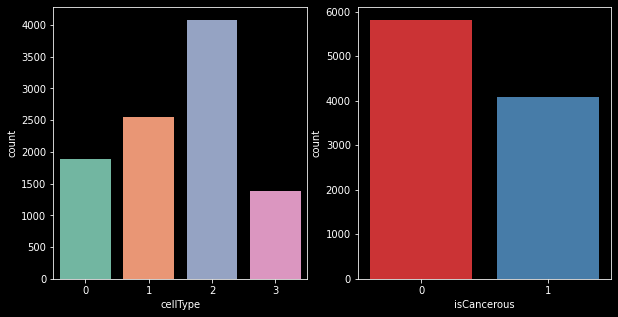

In [31]:
# Countplot the cellType and isCancerous
fig, ax =plt.subplots(1,2, figsize = (10,5))

sns.countplot(main_data['cellType'], palette='Set2', ax=ax[0])

sns.countplot(main_data['isCancerous'], palette='Set1', ax=ax[1])
fig.show()

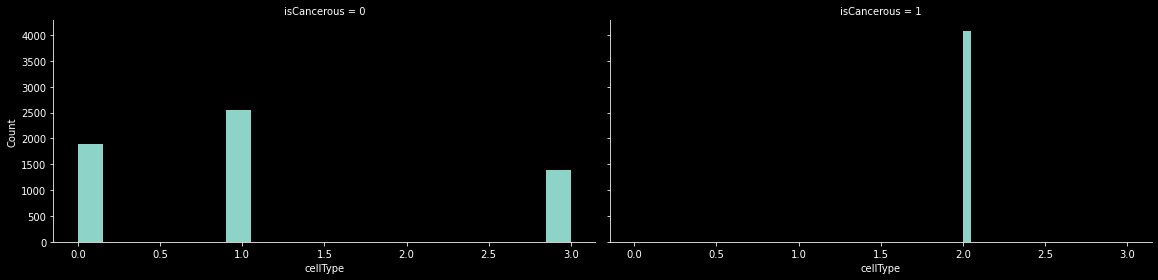

In [32]:
# Draw the histogram for cellType respected to isCancerous (class 0 and 1)
c = 'cellType'
g = sns.FacetGrid(main_data, col='isCancerous', height=4, aspect=2)
g.map(plt.hist, str(c), bins=20)
g.set_axis_labels(c, "Count")

In [33]:
# Apply loc to make sure
main_data.loc[(main_data['cellType'] != 2) & (main_data['isCancerous'] == 1)]

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous


From the dataset, it can be said that only cellType = 2 (epithelial) leads to cancerous 

### 2.3. Inspect images

In [34]:
# Prepare some image of each class
cell0 = main_data['ImageName'].loc[main_data['cellType'] == 0][:4].tolist()
cell1 = main_data['ImageName'].loc[main_data['cellType'] == 1][:4].tolist()
cell2 = main_data['ImageName'].loc[main_data['cellType'] == 2][:4].tolist()
cell3 = main_data['ImageName'].loc[main_data['cellType'] == 3][:4].tolist()

print(cell0)
print(cell1)
print(cell2)
print(cell3)

['22405.png', '22406.png', '22407.png', '22408.png']
['22417.png', '22418.png', '22419.png', '22420.png']
['276.png', '277.png', '278.png', '279.png']
['22423.png', '22424.png', '19061.png', '19062.png']


In [13]:
# CHANGE THE DIRECTORY IN YOUR LOCAL MACHINE
DIRECTORY = r"C:\Users\luong\Documents\GitHub\ML\Asm\ASM2\patch_images"

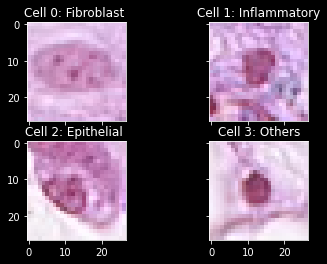

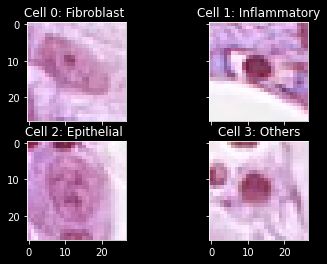

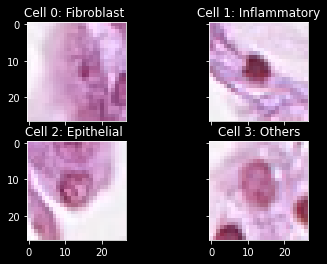

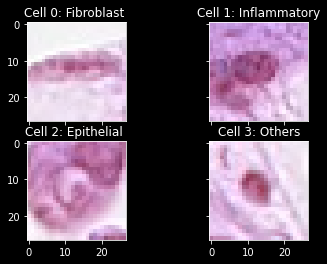

In [35]:
# Plotting 4 cellType
for i in range (4):
    # Read image
    cell_0 = cv2.imread(os.path.join(DIRECTORY, cell0[i]))
    cell_1 = cv2.imread(os.path.join(DIRECTORY, cell1[i]))
    cell_2 = cv2.imread(os.path.join(DIRECTORY, cell2[i]))
    cell_3 = cv2.imread(os.path.join(DIRECTORY, cell3[i]))

    # Create subplots
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
    
    # Draw cellType 0
    ax0.title.set_text("Cell 0: Fibroblast ")
    ax0.imshow(cell_0)
    
    # Draw cellType 1
    ax1.title.set_text("Cell 1: Inflammatory")
    ax1.imshow(cell_1)
    
    # Draw cellType 2
    ax2.title.set_text("Cell 2: Epithelial ")
    ax2.imshow(cell_2)
    
    # Draw cellType 3
    ax3.title.set_text("Cell 3: Others")
    ax3.imshow(cell_3)

    for ax in fig.get_axes():
        ax.label_outer()

## 3. Data preparation

### 3.1. Resampling data to have balance proportion

In [47]:
from sklearn.model_selection import train_test_split

# Split data into raw train and validation set
raw_train_task1, val_task1 = train_test_split(main_data[['ImageName','cellType']], 
                                        test_size = 0.25, 
                                        random_state = 99,
                                        )

raw_train_task2, val_task2 = train_test_split(main_data[['ImageName','isCancerous']], 
                                        test_size = 0.25, 
                                        random_state = 99,
                                        )

print('Train:', raw_train_task1.shape[0], 'Validation:', valid_task1.shape[0])

Train: 7422 Validation: 2474


New Data Size: 7400 Old Size: 7422


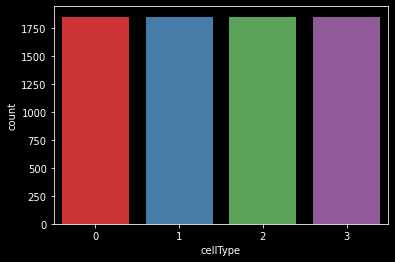

In [48]:
# Sampling data to have equal proportion of each type
train_task1 = raw_train_task1.groupby(['cellType']).apply(lambda x: x.sample(1850, replace = True)).reset_index(drop = True)

print('New Data Size:', train_task1.shape[0], 'Old Size:', raw_train_task1.shape[0])

# Countplot the cell type
sns.countplot(train_task1['cellType'], palette='Set1')
plt.show()

New Data Size: 7400 Old Size: 7422


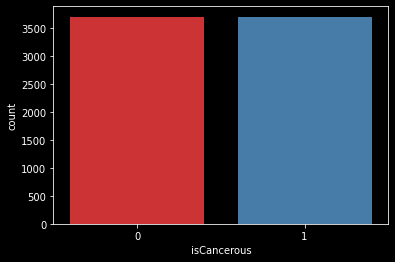

In [49]:
train_task2 = raw_train_task2.groupby(['isCancerous']).apply(lambda x: x.sample(3700, replace = True)).reset_index(drop = True)

print('New Data Size:', train_task2.shape[0], 'Old Size:', raw_train_task2.shape[0])

# Countplot the cell type
sns.countplot(train_task2['isCancerous'], palette='Set1')
plt.show()

### 3.2. Split into features and labels

In [50]:
# Split for task 1
train_X1 = train_task1['ImageName']
train_Y1 = train_task1['cellType']

test_X1 = val_task1['ImageName']
test_Y1 = val_task1['cellType']

train_Y1 = train_Y1.ravel()
test_Y1 = test_Y1.ravel()
print("Train data : {}, Test Data: {}".format(train_X1.shape[0], test_X1.shape[0]))

Train data : 7400, Test Data: 2474


In [51]:
# Split for task 2
train_X2 = train_task2['ImageName']
train_Y2 = train_task2['isCancerous']

test_X2 = val_task2['ImageName']
test_Y2 = val_task2['isCancerous']

train_Y2 = train_Y2.ravel()
test_Y2 = test_Y2.ravel()
print("Train data : {}, Test Data: {}".format(train_X2.shape[0], test_X2.shape[0]))

Train data : 7400, Test Data: 2474


### 3.3. Create image array

In [52]:
def create_train_data(directory, img_list):
    IMAGE_SIZE = 27
    train_data = []
    for img in tqdm(img_list, desc='Extracting Image Progress'):
        path = os.path.join(directory, img)
        img = cv2.resize(cv2.imread(path), (IMAGE_SIZE,IMAGE_SIZE))
        train_data.append(np.array(img))
    print("Successfully import images!")
    # Convert to np.array and normalize pixel values to be between 0 and 1 
    return np.array(train_data).astype('float32') / 255.0 

In [53]:
train_X1_img = create_train_data(DIRECTORY, train_X1.tolist())
test_X1_img = create_train_data(DIRECTORY, test_X1.tolist())

train_X2_img = create_train_data(DIRECTORY, train_X2.tolist())
test_X2_img = create_train_data(DIRECTORY, test_X2.tolist())

Extracting Image Progress:  10%|█████                                             | 248/2474 [00:00<00:00, 2462.01it/s]

Successfully import images!


Extracting Image Progress:   7%|███▎                                              | 484/7400 [00:00<00:01, 4804.04it/s]

Successfully import images!


Extracting Image Progress:  33%|████████████████▎                                 | 806/2474 [00:00<00:00, 8058.99it/s]

Successfully import images!


Extracting Image Progress: 100%|█████████████████████████████████████████████████| 2474/2474 [00:00<00:00, 7927.11it/s]

Successfully import images!


### 3.4. Data Augmentation

#### 3.4.1 Define ImageDataGenerator

In [57]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True, 
                             vertical_flip = True,
                             rotation_range=20, 
                             shear_range=0.2,  
                             fill_mode='nearest', 
                             width_shift_range=0.2, 
                             height_shift_range=0.2)

Params

#### 3.3.2 Preview augmentation

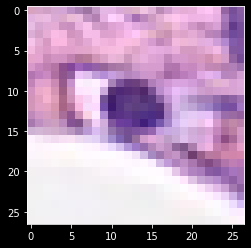

In [54]:
# Before augmentation (randomly pick an image)
from tensorflow.keras.preprocessing.image import load_img
img = load_img(r"patch_images/22418.png")
plt.imshow(img)

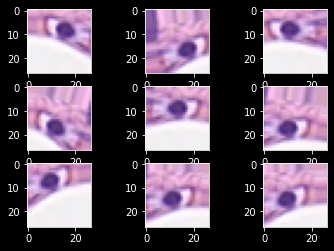

In [58]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Loading a sample image 
img = load_img(r"patch_images/22418.png")

# Converting the input sample image to an array
x = img_to_array(img)

# Reshaping the input image
x = x.reshape((1, ) + x.shape) 

# Pass img into datagen
it = datagen.flow(x,batch_size = 1)

# Plot some samples
for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Generate batch of images
    batch = it.next()
    # Convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # Plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

#### 3.3.3. Apply on train and test set

In [56]:
train_datagen1 = datagen.flow(train_X1_img, train_Y1, 
                             batch_size = 32,
                             shuffle = True)

train_datagen2 = datagen.flow(train_X2_img, train_Y2, 
                             batch_size = 32,
                             shuffle = True)

## 4. Task 1: Predict the cellType

### Constructing CNN network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(27,27, 3)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999) # CẦN TÌM CÁCH TWEAK ADAM
model.compile(optimizer = opt , 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Custom", 
                             monitor='val_acc',
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')

early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2,
                              patience=5, 
                              min_lr=0.001)
EPOCHS = 500
BATCH_SIZE = 64

import time
start_time = time.time()

history = model.fit(train_datagen, 
                    validation_data = (test_X_img, test_Y), 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS, 
                    verbose=1,
                    callbacks=[reduce_lr, early, checkpoint])

print("---  Training time in seconds ---%s " % (time.time() - start_time))

In [ ]:
t = time.time()
export = './{}.h5'.format(int(t))
print(export)

model.save(export)

In [ ]:
scores = model.evaluate(test_X_img, test_Y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('Max Test accuracy:', max(history.history['accuracy']))
# # visualizing losses and accuracy
# print(history.history.keys())
# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
pred = model.predict_classes(test_X_img)
pred.reshape(1,-1)[0]
print(classification_report(test_Y, pred))